In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error
import pickle
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
price_data = pd.read_csv('files/retail_price.csv')
price_data

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [3]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

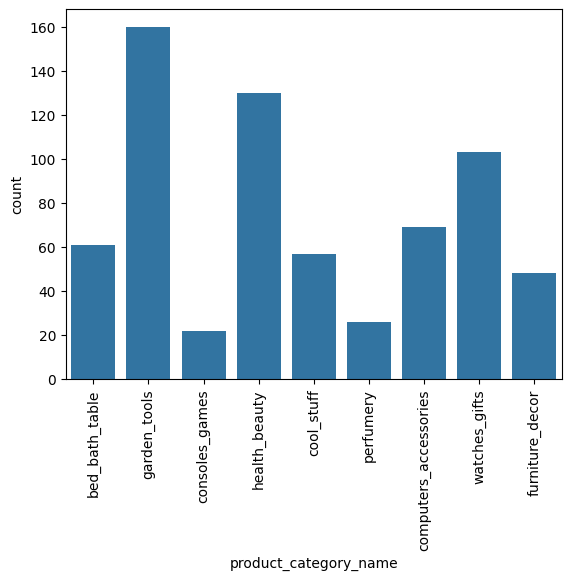

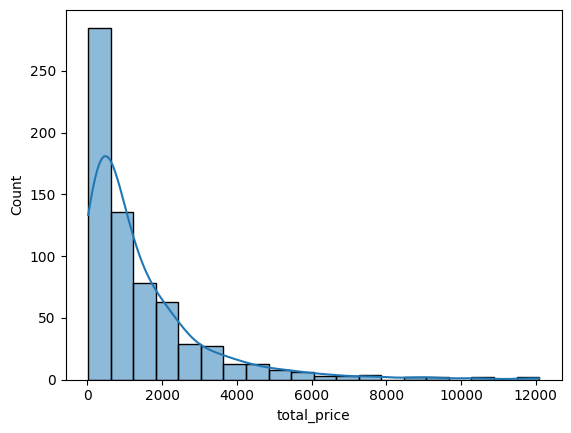

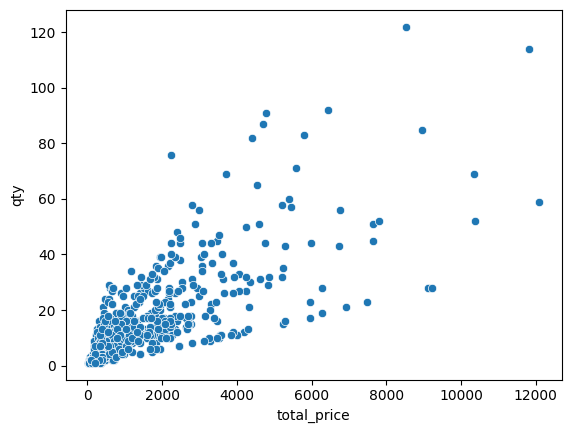

In [4]:
sns.countplot(x='product_category_name', data=price_data)
plt.xticks(rotation=90)
plt.show()

sns.histplot(price_data['total_price'], bins=20, kde=True)
plt.show()

# Bivariate Analysis
sns.scatterplot(x='total_price', y='qty', data=price_data)
plt.show()

# Time Series Analysis
price_data['month_year'] = pd.to_datetime(price_data['month_year'])
plt.show()

In [5]:
price_data['product_category_name'].unique()

array(['bed_bath_table', 'garden_tools', 'consoles_games',
       'health_beauty', 'cool_stuff', 'perfumery',
       'computers_accessories', 'watches_gifts', 'furniture_decor'],
      dtype=object)

In [6]:
encoder = LabelEncoder()
price_data['product_category_name'] = encoder.fit_transform(price_data['product_category_name'])

In [7]:
price_data.drop(columns=['product_id','month_year'],inplace=True)
price_data

,product_category_name,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,0,1,45.95,15.100000,45.950000,39,161,2,350,4.0,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,0,3,137.85,12.933333,45.950000,39,161,2,350,4.0,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,0,6,275.70,14.840000,45.950000,39,161,2,350,4.0,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,0,4,183.80,14.287500,45.950000,39,161,2,350,4.0,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,0,2,91.90,15.100000,45.950000,39,161,2,350,4.0,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,0,1,215.00,8.760000,215.000000,56,162,5,9750,4.4,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,0,10,2090.00,21.322000,209.000000,56,162,5,9750,4.4,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,0,59,12095.00,22.195932,205.000000,56,162,5,9750,4.4,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,0,52,10375.00,19.412885,199.509804,56,162,5,9750,4.4,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


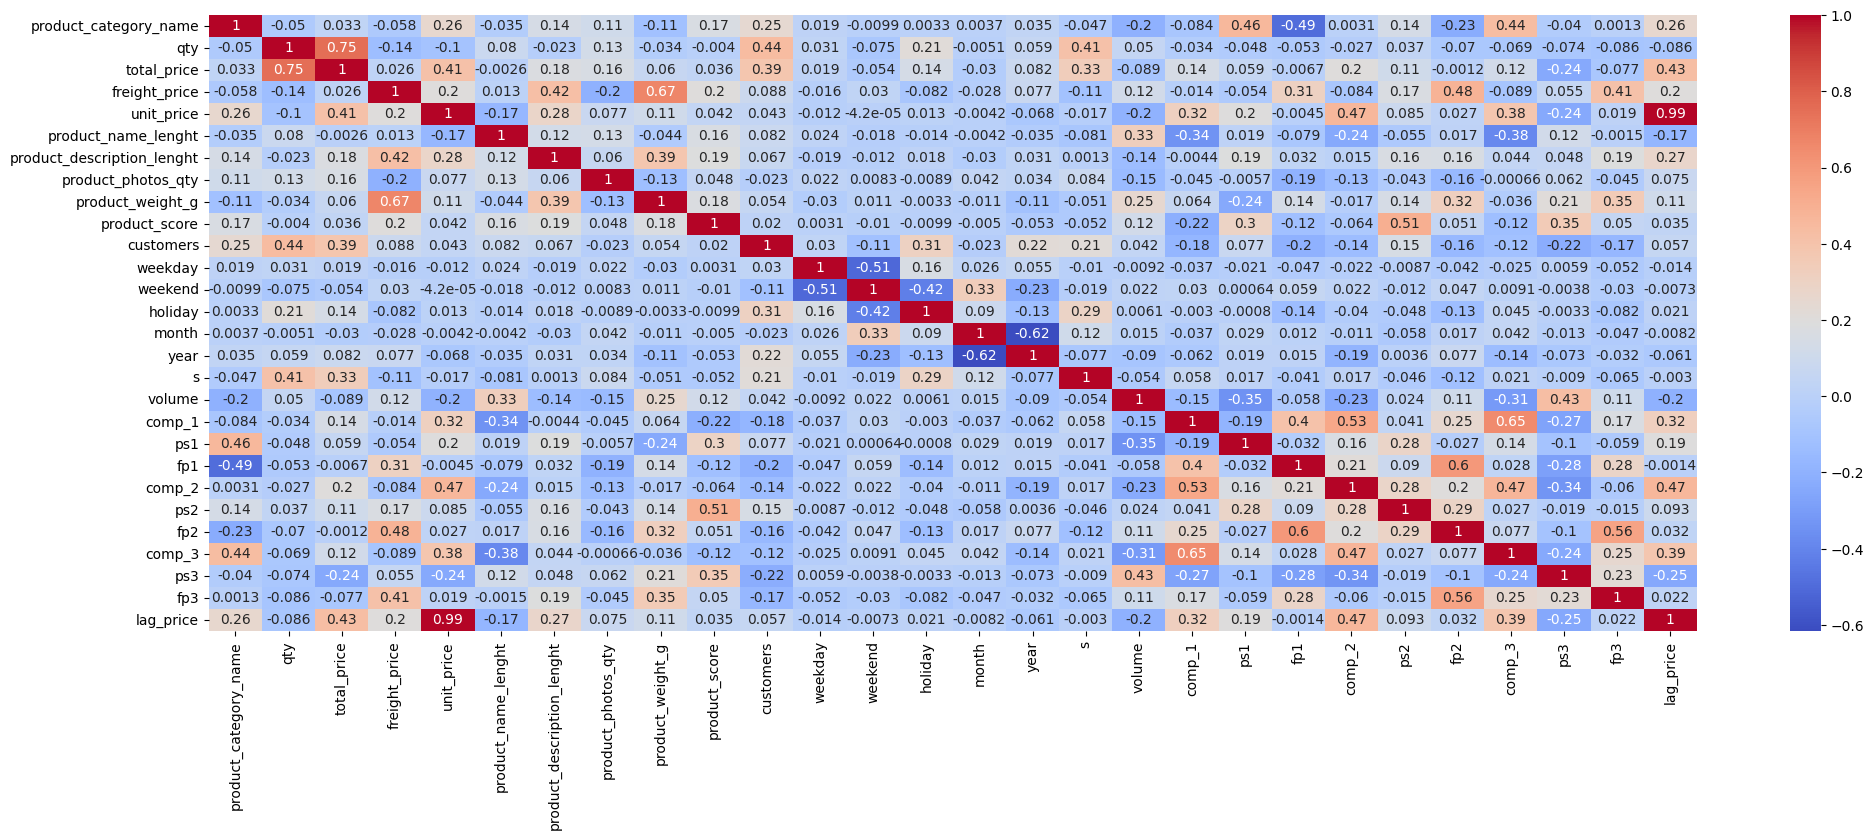

In [8]:
plt.figure(figsize=[24,8])
sns.heatmap(price_data.corr(), annot=True, cmap='coolwarm')
plt.show()

## Feature selection

[4.89192141e-04 6.14370087e-01 3.58354186e-03 1.31084684e-01
 4.49995067e-03 2.77712589e-03 5.91738814e-03 1.87205966e-03
 4.17995034e-03 5.03341556e-03 1.59112367e-03 4.57581266e-04
 5.42082950e-04 1.62939780e-03 5.63098928e-04 4.85065711e-03
 9.03031910e-04 4.43323704e-03 2.02677651e-04 4.33094064e-03
 1.29916072e-03 4.02828226e-04 4.75615135e-03 3.97829637e-03
 6.85673210e-04 4.30803687e-03 1.91258629e-01]


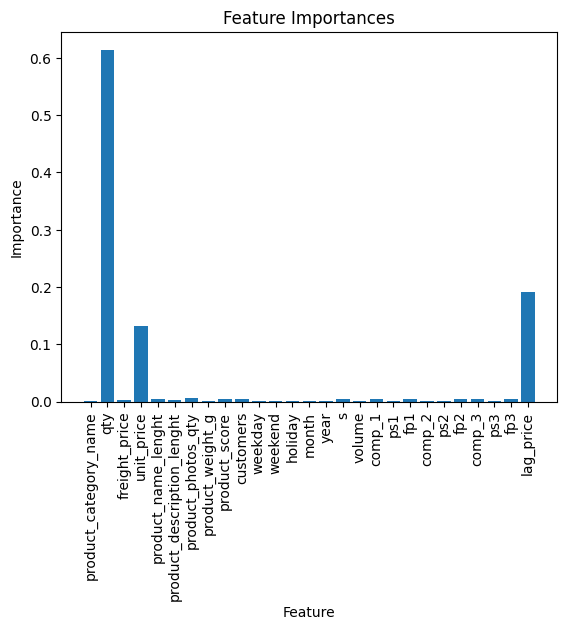

In [9]:
X = price_data.drop(columns=['total_price'])
y = price_data.total_price

correlation_matrix = X.corr()

rf = RandomForestRegressor()
rf.fit(X, y)
importances = rf.feature_importances_
print(importances)

# Plot feature importances
plt.bar(X.columns, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [10]:
price_data.drop(columns=['freight_price','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_score','product_score','weekday','weekend','holiday','month','year','s','volume','comp_1','ps1','fp1','comp_2','ps2','fp2','comp_3','ps3','fp3'],inplace=True)
price_data

,product_category_name,qty,total_price,unit_price,customers,lag_price
0,0,1,45.95,45.950000,57,45.900000
1,0,3,137.85,45.950000,61,45.950000
2,0,6,275.70,45.950000,123,45.950000
3,0,4,183.80,45.950000,90,45.950000
4,0,2,91.90,45.950000,54,45.950000
...,...,...,...,...,...,...
671,0,1,215.00,215.000000,57,214.950000
672,0,10,2090.00,209.000000,61,215.000000
673,0,59,12095.00,205.000000,123,209.000000
674,0,52,10375.00,199.509804,90,205.000000


## Data pre-processing

In [11]:
inscaler = StandardScaler()
scaled_X = inscaler.fit_transform(price_data.drop(columns=['total_price']))

outscaler = StandardScaler()
scaled_y = outscaler.fit_transform(price_data[['total_price']])

## Data sampling

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,scaled_y,test_size=0.1, random_state=0)

## Model Training

In [13]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [14]:
rf_pred = model.predict(X_test)

In [15]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Mean squared error:",rf_mse)
print("R squared score:",rf_r2)

Mean squared error: 0.030597591996468707
R squared score: 0.966171873277068


In [16]:
pickle.dump(model,open("files/price_optimization_model.pkl",'wb'))
pickle.dump(encoder,open("files/price_optimization_Encoder.pkl",'wb'))
pickle.dump(inscaler,open("files/price_optimization_inScaler.pkl",'wb'))
pickle.dump(outscaler,open("files/price_optimization_outScaler.pkl",'wb'))

## Inference

In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def price_optimization(product_category, qty, unit_price, customers, lag_price):
    # Load trained models and encoders
    model = pickle.load(open("files/price_optimization_model.pkl", 'rb'))
    encoder = pickle.load(open("files/price_optimization_Encoder.pkl", 'rb'))
    inscaler = pickle.load(open("files/price_optimization_inScaler.pkl", 'rb'))
    outscaler = pickle.load(open("files/price_optimization_outScaler.pkl", 'rb'))

    # Encode categorical variable
    product_category_encoded = encoder.transform([product_category])[0]  

    # Calculate Total Price
    total_price = qty * unit_price  

    # Convert input into a NumPy array
    input_data = np.array([[product_category_encoded, qty, unit_price, customers, lag_price]])

    # Scale input data
    scaled_input = inscaler.transform(input_data)

    # Predict optimized price
    prediction = model.predict(scaled_input)

    # Inverse transform the prediction
    inverse_scaled_pred = outscaler.inverse_transform(prediction.reshape(-1, 1))

    # Extract the predicted optimized price
    optimized_price = inverse_scaled_pred[0][0]

    # Create a dictionary for all attributes (input & output)
    attributes = {
        "Product Category (Encoded)": product_category_encoded,
        "Quantity": qty,
        "Unit Price": unit_price,
        "Customers": customers,
        "Lag Price": lag_price,
        "Total Price": total_price,
        "Optimized Price": optimized_price
    }

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(attributes.keys()), y=list(attributes.values()), palette="viridis")

    # Annotate values on bars
    for index, value in enumerate(attributes.values()):
        plt.text(index, value + 0.05 * max(attributes.values()), f"{value:.2f}", ha='center', fontsize=10, fontweight='bold')

    # Add title and labels
    plt.xticks(rotation=20, ha='right', fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.title("Price Optimization Analysis", fontsize=14, fontweight='bold')

    # Save the graph
    graph_path = "files/price_optimization_result.png"
    plt.savefig(graph_path, bbox_inches="tight")
    plt.close()

    return f"Optimized Price: Rs {optimized_price:.2f}", f"Total Price: Rs {total_price:.2f}", graph_path  

# Example usage
optimized_price, total_price, graph = price_optimization('cool_stuff', 2, 78, 34, 89)
print(optimized_price)  
print(total_price)  
print(f"Graph saved at: {graph}")  


Optimized Price: Rs 174.98
Total Price: Rs 156.00
Graph saved at: files/price_optimization_result.png


In [18]:
print(price_optimization('perfumery', 7, 78, 704, 189))

('Optimized Price: Rs 1265.78', 'Total Price: Rs 546.00', 'files/price_optimization_result.png')
